In [73]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

### Task 1 Популяція за інтервал часу 1960-2020

* ### Таблиця

In [74]:
print(os.listdir('../src/population'))

['population.json', 'population.csv', 'population_pandas.xlsx']


In [75]:
data_population = pd.read_csv('../src/population/population.csv')

In [76]:
data_population

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


In [77]:
data_population.describe()

,Year,Value
count,15409.000000,1.540900e+04
mean,1989.069764,2.081236e+08
std,17.031017,6.868312e+08
min,1960.000000,3.893000e+03
25%,1974.000000,9.268410e+05
50%,1989.000000,6.418773e+06
75%,2004.000000,4.244904e+07
max,2018.000000,7.594270e+09


Як бачимо мінімальне значення колонки 'Year' = 1960, а максимальне - 2020. Тому популяція за 1960 - 2020 роки це сама таблиця data_population.

*Також можна сформувати таблицю за необхідний період часу іншим чином.*

Створюємо нову таблицю популяції за фільтром інтервалу часу 1960 - 2020.

In [78]:
cust_filter = 1960
cust_filter2 = 2018
data_1960_2020 = data_population.query('Year >= @cust_filter | Year <= @cust_filter2')
data_1960_2020

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


Можемо перевірити чи правильно були відфільтровані дані за допомогою **set**.

In [79]:
# set - unordered collection of unique elements
set1 = set(data_1960_2020['Year'])
print('number of elements ', len(set1))

number of elements  59


**set** - невпорядкована колекція унікальних елементів. Тому можемо дізнатися кількість унікальних значень стовпця "Рік" і перевірити чи є серед них значення, які не входять у проміжок 1960 - 2020.

In [80]:
count = 0 
for element in set1:
    if element < 1960 or element > 2020:
        # print('{} is not in [1960, 2020]'.format(element))
        count += 1
        
if count == 0:
    print('All elements of set1 are in [1960, 2020]')
else:
    print('{} elements of set1 are NOT in [1960, 2020]'.format(count))  


All elements of set1 are in [1960, 2020]


*Отже, таблиця популяції за 1960 - 2020 представлена як* **data_1960_2020**.

In [81]:
if not os.path.exists('./tables and graphs'):
    os.mkdir('./tables and graphs')

In [82]:
data_1960_2020.to_csv("./tables and graphs/data_1960_2020.csv", index=False)

In [83]:
data_1960_2020.to_excel("./tables and graphs/data_1960_2020.xlsx", sheet_name="Sheet1", index=False)

In [84]:
data_1960_2020.to_json(path_or_buf="./tables and graphs/data_1960_2020.json", orient="split")

* ### Графіки

Покажемо на графіках топ найменших за популяцією країн. Для цього спочатку згрупуємо дані за стовпчиком **'Country Name'** та просумуємо за стовпчиком **'Value'**. Відсортуємо у порядку зростання. В **'top'** запишемо перші n країн. Наприклад, перші 5.

In [85]:
count = 5 # count of countries for the top
grouped_df = data_1960_2020.groupby('Country Name')['Value'].sum()
top = grouped_df.sort_values(ascending=True).head(count)

1. #### Лінійний графік

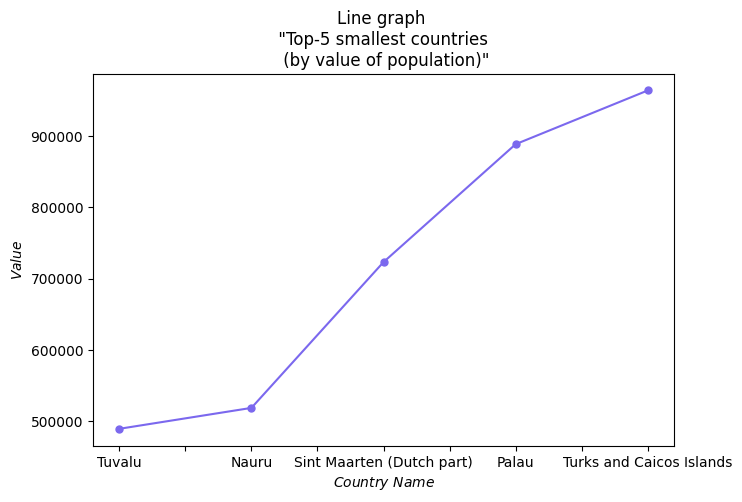

In [86]:
fig, ax = plt.subplots(figsize=(count*1.5, count/1.5+1.5))
res = top.plot(x="Year", y="Value", color="mediumslateblue", ylabel='Value', title="Line graph \n ", marker=".", markersize=10).get_figure()

plt.title('Line graph \n "Top-'f'{count}' ' smallest countries \n (by value of population)"')
plt.ylabel('$ Value $')
plt.xlabel('$ Country \ Name $')
res.savefig('./tables and graphs/line1_population.png', bbox_inches='tight')
# plt.legend(bbox_to_anchor=(1,1), loc="upper left")

2. #### Кругова діаграма

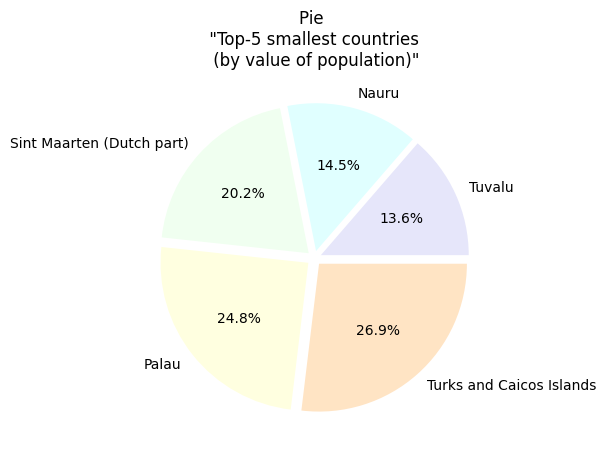

In [87]:
list_exp = [0.05 for i in range(count)]
explode = tuple(list_exp)

colors = ['lavender', 'lightcyan', 'honeydew', 'lightyellow', 'bisque', 'mistyrose',  'whitesmoke'] 

res = top.plot(kind='pie', y = 'Value', autopct='%1.1f%%', explode=explode, ylabel = '',colors = colors, shadow=False).get_figure()

plt.title('Pie \n "Top-'f'{count}' ' smallest countries \n (by value of population)"')
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")

res.savefig('./tables and graphs/pie1_population.png', bbox_inches='tight')

3. #### Стовпчаста діаграма

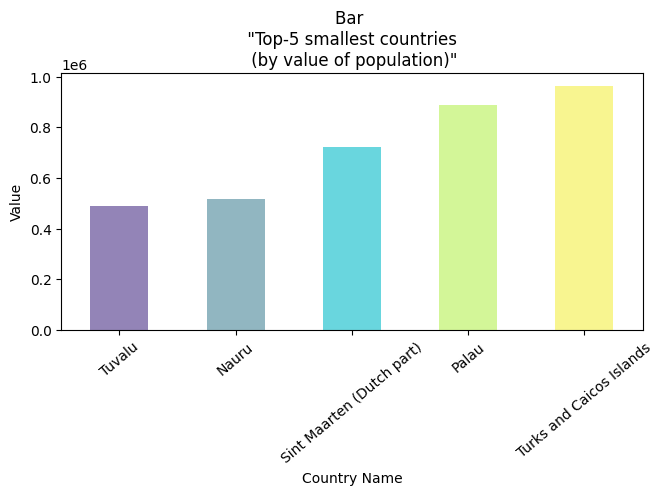

In [88]:
#names_coutry = [top.index[i] for i in range(len(top))]

fig, ax = plt.subplots(figsize=(count*1.5, count/1.5))

#color_rectangle = np.random.rand(count, 3)    # RGB
color_rectangle = [
    [0.57745045, 0.51609339, 0.71706274],
    [0.56698063, 0.71535438, 0.75541086],
    [0.41062479, 0.8407867,  0.87001545],
    [0.82670165, 0.96549147, 0.59721125],
    [0.9737108,  0.96112498, 0.56562821] ]

res = top.plot(kind = 'bar', x="Country Name", y="Value", label="Value", color = color_rectangle).get_figure()
ax.tick_params(axis='x', labelrotation=40)
plt.title('Bar \n "Top-'f'{count}' ' smallest countries \n (by value of population)"')
plt.ylabel('Value')
plt.xlabel('Country Name')
res.savefig('./tables and graphs/bar1_population.png', bbox_inches='tight')

### Task 2 Показати в табличному вигляді основні стаститичні величини: min, max, mean, квантіли 25%, 75%, 95%.

In [97]:
data_population = pd.read_csv('../src/population/population.csv')
data_population.describe()

,Year,Value
count,15409.000000,1.540900e+04
mean,1989.069764,2.081236e+08
std,17.031017,6.868312e+08
min,1960.000000,3.893000e+03
25%,1974.000000,9.268410e+05
50%,1989.000000,6.418773e+06
75%,2004.000000,4.244904e+07
max,2018.000000,7.594270e+09


In [101]:
data_ppp = pd.read_csv('../src/ppp/ppp-gdp.csv')
data_ppp.head()

,Country,Country ID,Year,PPP
0,Lebanon,LB,2021,3410.356913
1,Lebanon,LB,2020,1420.823934
2,Lebanon,LB,2019,780.221488
3,Lebanon,LB,2018,755.856521
4,Lebanon,LB,2017,734.775880


In [102]:
data_ppp.describe()

,Year,PPP
count,6011.000000,6.011000e+03
mean,2005.898686,1.879394e+02
std,9.120850,1.067238e+03
min,1990.000000,7.336060e-10
25%,1998.000000,8.734769e-01
50%,2006.000000,2.753295e+00
75%,2014.000000,4.448685e+01
max,2021.000000,4.607246e+04


In [127]:
files_oil = os.listdir('../src/oil-prices')
files_oil_csv = [file for file in files_oil if '.csv' in file]
#files_oil_csv                 

In [128]:
fn_parts = [os.path.splitext(files_oil_csv[i]) for i in range(len(files_oil_csv))]
print(fn_parts)

fn_name = fn_parts[0]

[('wti-year', '.csv'), ('wti-daily', '.csv'), ('wti-weekly', '.csv'), ('brent-daily', '.csv'), ('brent-year', '.csv'), ('wti-monthly', '.csv'), ('brent-monthly', '.csv'), ('brent-weekly', '.csv')]


    fn_parts = os.path.splitext(filename_json)
    fn_name = fn_parts[0]
    filename_xlsx = fn_name + '_pandas.xlsx'

In [117]:
join_path = os.path.join('../src/oil-prices', files_oil_csv[0])
print(join_path)

df1_oil = pd.read_csv(join_path)
(df1_oil.head(3)).style

../src/oil-prices/wti-year.csv


,Date,Price
0,1986-06-30,15.050000
1,1987-06-30,19.200000
2,1988-06-30,15.970000


In [147]:
df_descr = [] 
for i in range(len(files_oil_csv)):

    join_path = os.path.join('../src/oil-prices', files_oil_csv[i])
    print('#', i+1, join_path)

    df_oil = pd.read_csv(join_path)
    
    print('.head(3):\n{}'.format(df_oil.head(3)))
    df_descr.append(df_oil.describe())
    print('\n.describe():\n{}'.format(df_oil.describe()))
    
    print()


# 1 ../src/oil-prices/wti-year.csv
.head(3):
         Date  Price
0  1986-06-30  15.05
1  1987-06-30  19.20
2  1988-06-30  15.97

.describe():
           Price
count  37.000000
mean   46.096216
std    28.904254
min    14.420000
25%    20.580000
50%    39.160000
75%    66.050000
max    99.670000

# 2 ../src/oil-prices/wti-daily.csv
.head(3):
         Date  Price
0  1986-01-02  25.56
1  1986-01-03  26.00
2  1986-01-06  26.53

.describe():
             Price
count  9347.000000
mean     46.116338
std      29.600880
min     -36.980000
25%      19.990000
50%      36.060000
75%      67.360000
max     145.310000

# 3 ../src/oil-prices/wti-weekly.csv
.head(3):
         Date  Price
0  1986-01-03  25.78
1  1986-01-10  25.99
2  1986-01-17  24.57

.describe():
             Price
count  1936.000000
mean     46.150511
std      29.562021
min       3.320000
25%      19.990000
50%      36.645000
75%      67.535000
max     142.520000

# 4 ../src/oil-prices/brent-daily.csv
.head(3):
         Date  Price
0

In [150]:
df_descr[0]

,Price
count,37.000000
mean,46.096216
std,28.904254
min,14.420000
25%,20.580000
50%,39.160000
75%,66.050000
max,99.670000
